# Energy Transitions Python Tutorial

Using Python, create a plot of primary energy consumption (Quadrillion) versus time
from 1635 – 2017.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Read in CSV file as a dataframe

In [2]:
df_data = pd.read_csv('data/Primary Energy Consumption_from 1635.csv', skiprows = 2)

In [3]:
df_data.head()

,Unnamed: 0,Coal,Natural Gas,Petroleum,Total Fossil,Nuclear,Hydropower,Wood/ biomass,Solar,Wind,Total Renewable Energy
0,1635,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.000
1,1645,NaN,NaN,NaN,0.0,NaN,NaN,0.001,NaN,NaN,0.001
2,1655,NaN,NaN,NaN,0.0,NaN,NaN,0.002,NaN,NaN,0.002
3,1665,NaN,NaN,NaN,0.0,NaN,NaN,0.005,NaN,NaN,0.005
4,1675,NaN,NaN,NaN,0.0,NaN,NaN,0.007,NaN,NaN,0.007


In [4]:
# rename first column as "Year"
df_data = df_data.rename(columns = { df_data.columns[0]: "Year" })

In [5]:
df_data.head()

,Year,Coal,Natural Gas,Petroleum,Total Fossil,Nuclear,Hydropower,Wood/ biomass,Solar,Wind,Total Renewable Energy
0,1635,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.000
1,1645,NaN,NaN,NaN,0.0,NaN,NaN,0.001,NaN,NaN,0.001
2,1655,NaN,NaN,NaN,0.0,NaN,NaN,0.002,NaN,NaN,0.002
3,1665,NaN,NaN,NaN,0.0,NaN,NaN,0.005,NaN,NaN,0.005
4,1675,NaN,NaN,NaN,0.0,NaN,NaN,0.007,NaN,NaN,0.007


## Fill NAs

In [6]:
df_data = df_data.fillna(0)

## Create new column for sum of non-hydro renewables

In [7]:
df_data['Other Renewables'] = df_data['Solar'] + df_data['Wind']

## Transform data

When plotting a time series of categorical data, it's often easiest to have your data in a "long" format instead of a "wide" format (like above). So, this next step will transform your data so that all the values for the different fuel types will be put into a single column. Another column labeled "Fuel" will specify the type of fuel.

In [8]:
df_long = pd.melt(df_data, 
                  id_vars = 'Year', 
                  value_vars = ['Coal', 'Natural Gas', 'Petroleum', 
                                'Nuclear', 'Hydropower', 
                                'Wood/biomass', 'Solar', 'Wind', 
                                'Other Renewables', 'Total Fossil', 'Total Renewable Energy'], 
                  var_name = 'Fuel', value_name = 'Value')

/Users/MEAS/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [9]:
df_long.head()

,Year,Fuel,Value
0,1635,Coal,0.0
1,1645,Coal,0.0
2,1655,Coal,0.0
3,1665,Coal,0.0
4,1675,Coal,0.0


## Remove totals

In [10]:
df_fuels = df_long[~df_long.Fuel.isin(['Total Fossil', 'Total Renewable Energy', 'Solar', 'Wind'])]

## Plot data

### Preliminary plot

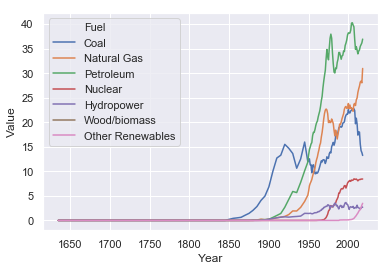

In [11]:
ax = sns.lineplot(data = df_fuels, x = "Year", y = "Value", hue = "Fuel")

In [12]:
matplotlib.style.use('ggplot')

### Specify fuel type colors

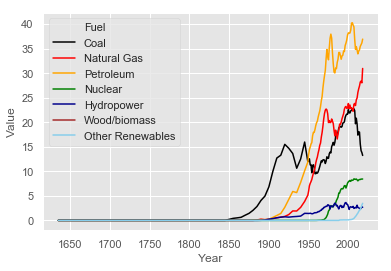

In [13]:
ax = sns.lineplot(data = df_fuels, x = "Year", y = "Value", hue = "Fuel",
                  palette = {"Petroleum": "orange",
                             "Natural Gas": "red",
                             "Coal": "black",
                             "Nuclear": "green",
                             "Hydropower": "darkblue",
                             "Wood/biomass": "brown",
                             "Other Renewables": "skyblue"});

### Change axes

In [ ]:
ax = sns.lineplot(data = df_fuels, x = "Year", y = "Value", hue = "Fuel",
                  palette = {"Petroleum": "orange",
                             "Natural Gas": "red",
                             "Coal": "black",
                             "Nuclear": "green",
                             "Hydropower": "darkblue",
                             "Wood/biomass": "brown",
                             "Other Renewables": "skyblue"});
ax.set_title('US Primary Energy Consumption by Source (1635 – 2017)', fontsize = 18);
ax.set_xlabel('Year', fontsize = 15);
ax.set_ylabel('Quadrillion Btu', fontsize = 15);
ax.set_xlim([1635,2017]);
ax.set_ylim([0,45]);

In [ ]:
ax = sns.lineplot(data = df_fuels, x = "Year", y = "Value", hue = "Fuel",
                  palette = {"Petroleum": "orange",
                             "Natural Gas": "red",
                             "Coal": "black",
                             "Nuclear": "green",
                             "Hydropower": "darkblue",
                             "Wood/biomass": "brown",
                             "Other Renewables": "skyblue"})
ax.set_title('US Primary Energy Consumption by Source (1635 – 2017)', fontsize = 18);
ax.set_xlabel('Year', fontsize = 15);
ax.set_ylabel('Quadrillion Btu', fontsize = 15);
ax.set_xlim([1635,2017]);

In [14]:
ax.savefig("output.png")


AttributeError: 'AxesSubplot' object has no attribute 'savefig'